In [16]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.firefox.service import Service as FirefoxService
from webdriver_manager.firefox import GeckoDriverManager
from selenium.webdriver.common.by import By
import matplotlib.pyplot as plt

In [ ]:
# Create Webdriver

driver = webdriver.Firefox(service=FirefoxService(GeckoDriverManager().install()))

In [ ]:
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"

driver.get(page_url)

In [ ]:
# Find the books
from selenium.webdriver.common.by import By

book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

print("Text: ", book_categories[0].text,"\n", "href:", book_categories[0].get_attribute('href'))

In [ ]:
# Go in and get each character and element

character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')

In [ ]:
character_elements[0].text

## Initiate Driver and get all Books

In [7]:
# Create Driver
driver = webdriver.Firefox(service=FirefoxService(GeckoDriverManager().install()))

# Go to the Character's in the books page
page_url = "https://witcher.fandom.com/wiki/Category:Characters_in_the_stories"
driver.get(page_url)

# Find The Books
book_categories = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
# print("Text: ", book_categories[0].text,"\n", "href:", book_categories[0].get_attribute('href'))

# Loop through all books
books = []
for category in book_categories:
    book_url = category.get_attribute('href')
    book_name = category.text
    books.append({'book_name': book_name, 'url': book_url})

[WDM] - Downloading: 16.2kB [00:00, 12.4MB/s]                                                              


Text:  Category:Baptism of Fire characters 
 href: https://witcher.fandom.com/wiki/Category:Baptism_of_Fire_characters


### Get Characters in Each Book

In [9]:
character_list = []

for book in books:
    # Go to each book page
    driver.get(book['url'])
    
    character_elements = driver.find_elements(By.CLASS_NAME, 'category-page__member-link')
    
    for elem in character_elements:
        character_list.append({'book': book['book_name'], 'character': elem.text})

In [12]:
# Put character list in df

characters = pd.DataFrame(character_list)
characters.head()

,book,character
0,Category:Baptism of Fire characters,Adalia
1,Category:Baptism of Fire characters,Adela
2,Category:Baptism of Fire characters,Aen Saevherne
3,Category:Baptism of Fire characters,Aevenien
4,Category:Baptism of Fire characters,Aglaïs


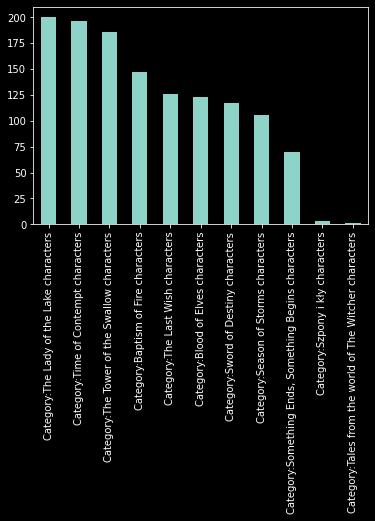

In [19]:
# Do some quick EDA
plt.style.use('dark_background') # for dark modes
characters['book'].value_counts().plot(kind="bar")
plt.show()

### Save To CSV

In [22]:
characters.to_csv('./characters/characters.csv', index=False)